# Kinds Problem

In [1]:
from pprint import pprint

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from pandas.plotting import lag_plot

import os; import sys;

import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from utils.utils_fancy_example.utils_fancy_example import *
from utils.utils_fancy_example.utils_computation_fancy_example import *
from utils.utils_fancy_example.utils_plot_fancy_example import *
from utils.utils_fancy_example.utils_ml_fancy_example import *
from utils.utils_fancy_example.utils_fancy_example_df_plots import *
from utils.sklearn_tests_plot import *


In [2]:
np.random.seed(0)

T = 8
N_MIN, N_MAX = 8, 50
TARGET = 't'

In [3]:
DIR_IMAGES = 'images'
DIR_NOTEBOOK_IMG = 'fancy_example'
dest_dir_images = os.path.join(DIR_IMAGES, DIR_NOTEBOOK_IMG)

setup_dir_for_images(dest_dir_images)

full_path_trial = os.path.join(dest_dir_images, f"trial_{N_MIN}_to_{N_MAX}")
setup_dir_for_images(dest_dir_images)

## Rough Explanation
Let $a, b, x_{1}, x_{2}, y_{1}, y_{2} $ be numbers $\in N$ such that $x = \{x_{1}, x_{2}\} \land x \in R^{2}$ and $y = \{y_{1}, y_{2}\} \land y \in R^{2}$, while $w \in R^{2x2}$ and let define the subsequent linear system:

\begin{equation}
    \begin{cases}
      y_{1} = w_{y11} \cdot a + w_{y12} \cdot b\\
      y_{2} = w_{y21} \cdot a + w_{y22} \cdot b\\
    \end{cases}\
    \Rightarrow
    \begin{cases}
      y_{1} = w_{y11} \cdot x_{1} + w_{y12} \cdot x_{2} \\
      y_{2} = w_{y21} \cdot x_{2} + w_{y22} \cdot x_{2}\\
    \end{cases}\
\end{equation}

which can easily be converted into a matrix equivalent expression, in the following manner:

 \begin{gather}
  y = w \cdot x \\
 y = \begin{bmatrix} y_{1}  \\ y_{2}  \end{bmatrix}
 = \begin{bmatrix}
    w_{x1} & w_{x2} \\
    w_{y1} & w_{y2} \\
   \end{bmatrix} \cdot x
   = \begin{bmatrix}
    w_{x1} & w_{x2} \\
    w_{y1} & w_{y2} \\
   \end{bmatrix} \cdot \begin{bmatrix} x_{1}  \\ x_{2}  \end{bmatrix}
   = \begin{bmatrix}
    w_{x1} & w_{x2} \\
    w_{y1} & w_{y2} \\
   \end{bmatrix} \begin{bmatrix} a  \\ b  \end{bmatrix}
\end{gather}

If we select some weight values what we obtain is the subsequent flow of relationships:

\begin{equation}
    \begin{cases}
      w_{y11} = 3/4 = 0.75 \\ w_{y12} = 1/2 = 0.50 \\
      w_{y21} = 1/4 = 0.25 \\ w_{y22} = 1/2 = 0.50
    \end{cases}\,
    \Rightarrow
    \begin{cases}
      x =  0.75 \cdot a + 0.50 \cdot b\\
      y = 0.25 \cdot a + 0.50 \cdot b\\
    \end{cases}\
    \Rightarrow
    \begin{bmatrix} y_{1}  \\ y_{2}  \end{bmatrix}
     = \begin{bmatrix}
     0.75 & 0.50 \\
    0.25 & 0.50 \\
   \end{bmatrix} \cdot \begin{bmatrix} a  \\ b  \end{bmatrix}
    \Rightarrow \\
    \begin{bmatrix} y_{1}  \\ y_{2}  \end{bmatrix}
     = \begin{bmatrix}
     0.75 & 0.50 \\
    0.25 & 0.50 \\
   \end{bmatrix} \cdot \begin{bmatrix} x_{1}  \\ x_{2}  \end{bmatrix}
    \Rightarrow
    \begin{bmatrix} y_{1}  \\ y_{2}  \end{bmatrix}
     = \begin{bmatrix}
     0.75 & 0.50 \\
    0.25 & 0.50 \\
   \end{bmatrix} \cdot x
\end{equation}

So let $f$ be the thru model or function, and $w \in R^{nxn}$, such that $f(x; w) = o$ where $x \in R^{n}$ and $o \in R^{n}$, in our particular case the model will be characterized as follows:
- $f(x;w) = o$ where $x \in R^{2}$ and $w \in R^{2x2}$, and $o \in R^{2}$

Indeed we want a machine learning model that is able to predict the output vector $o \in R^{2}$. However, we can go further and identify a statistical learning model that is able to compute the sum of output vector $o \in R^{2}$ such that the $y = 2 \cdot n$, where both $y, n \in N$.

In order words, we want a model that will behave as follows:

\begin{equation}
    \begin{cases}
      x \in R^{n}, x \in R^{2}\\
      w_{f} \in R^{nxn}, w_{f} \in R^{2x2}\\
      w_{g} \in R^{mxz}
    \end{cases}\
    \Rightarrow
    \begin{cases}
      f(x; w_{f}) = o \\
      g(o; w_{g}) = y \\
    \end{cases}\
    \Rightarrow
    y \in R \land y \in \{\alpha | \alpha = 2 \cdot n \land n \in N\}
\end{equation}

In other words:
\begin{equation}
    \begin{cases}
      f(x; w_{f}) = o \\
      g(o; w_{g}) = y \\
    \end{cases}\
    \Rightarrow
      g(f(x; w_{f}); w_{g}) = y
\end{equation}

In [4]:
raw_examples()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

In [5]:
raw_examples_v2()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

## Structural Expalnation

In [6]:
solve_problem(t=T, verbose=2, whole_solutions=False)

[2 4 6] <class 'numpy.ndarray'>
[2 4 6] <class 'numpy.ndarray'>
[4]
4 2 [4. 2.] 6.0
4 4 [5. 3.] 8.0
append [array([4, 4]), array([5., 3.]), 8]
4 6 [6. 4.] 10.0


array([[array([4, 4]), array([5., 3.]), 8]], dtype=object)

## Structural Simulation

In [7]:
t_attempts, results = solve_problem_v2(t_min=N_MIN, t_max=N_MAX, verbose=0, whole_solutions=False)

In [8]:
instances_x_result = np.array(list(map(lambda xi: len(xi), results)))
x, y = np.array(list(t_attempts)), instances_x_result
# x, y = np.array(t_attempts), instances_x_result

### Plots Structural Simulation

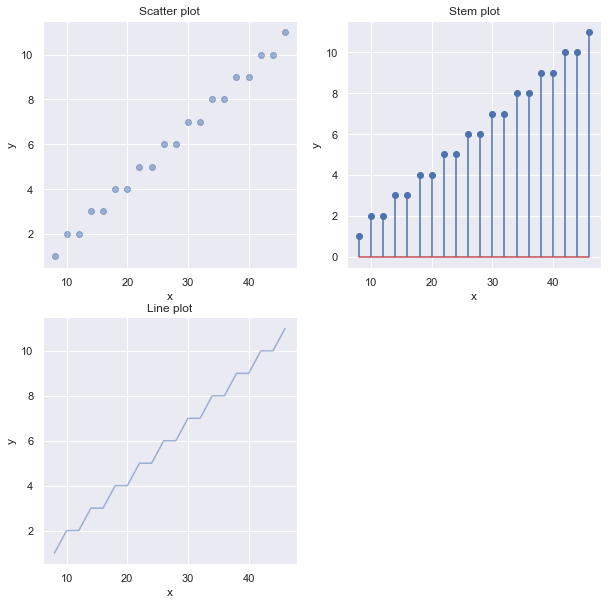

In [9]:
plot_stem_line_scatter(x[:20], y[:20], gridshape=[2, 2], figsize=(10, 10))

## Data Frame Analysis Section

In [10]:
df = create_data_frame(raw_data=results)

In [11]:
# df.head(df.shape[0])
df.head(5)

x    y    a    b     t
0  5.0  3.0  4.0  4.0   8.0
1  7.0  3.0  8.0  2.0  10.0
2  6.0  4.0  4.0  6.0  10.0
3  8.0  4.0  8.0  4.0  12.0
4  7.0  5.0  4.0  8.0  12.0

### __Show difference between 'x' and 'y' features__

In [12]:
n_samples = df.shape[0]
x_vals = df.head(n_samples)[['x']].values
y_vals = df.head(n_samples)[['y']].values

In [13]:
diffs_x_y = x_vals - y_vals
x, y = list(range(len(diffs_x_y))), diffs_x_y

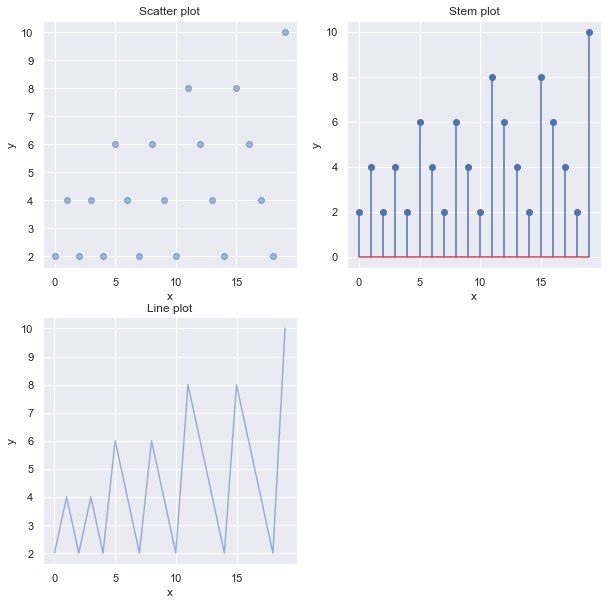

In [14]:
plot_stem_line_scatter(x[:20], y[:20], gridshape=[2, 2], figsize=(10, 10))

### __Show difference between 'a' and 'b' features__

In [15]:
n_samples = df.shape[0]
a_vals = df.head(n_samples)[['a']].values
b_vals = df.head(n_samples)[['b']].values

In [16]:
diffs_a_b = a_vals - b_vals
x, y = list(range(len(diffs_a_b))), diffs_a_b

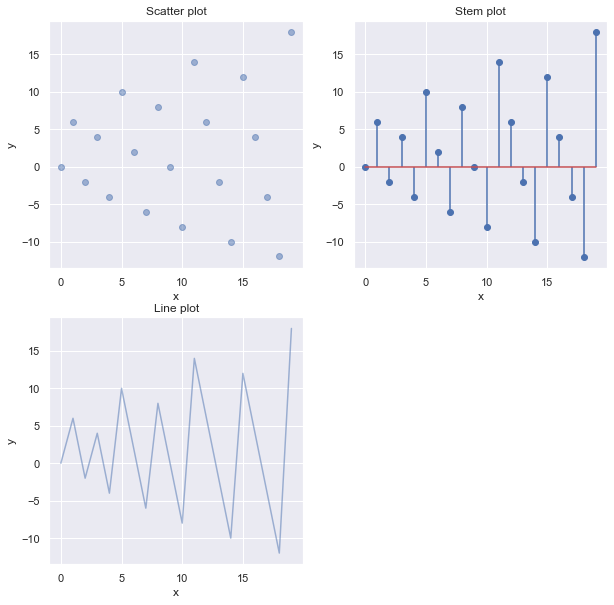

In [17]:
plot_stem_line_scatter(x[:20], y[:20], gridshape=[2, 2], figsize=(10, 10))

### Basis df plots

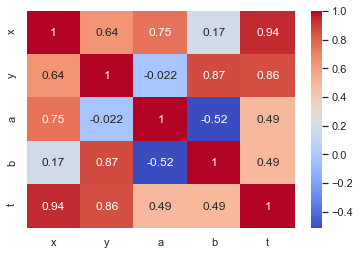

In [18]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

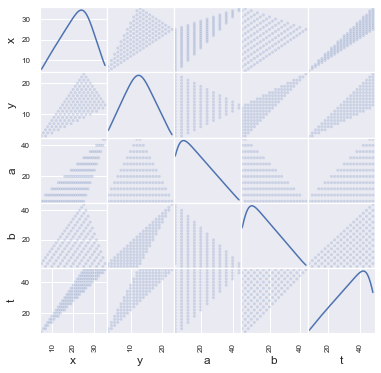

In [19]:
# _ = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

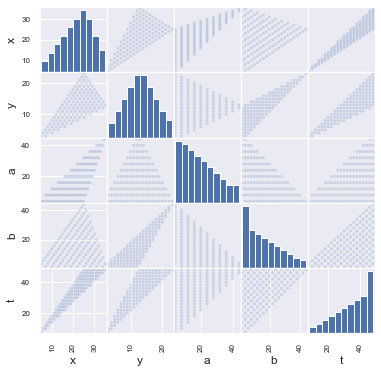

In [20]:
# _ = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')

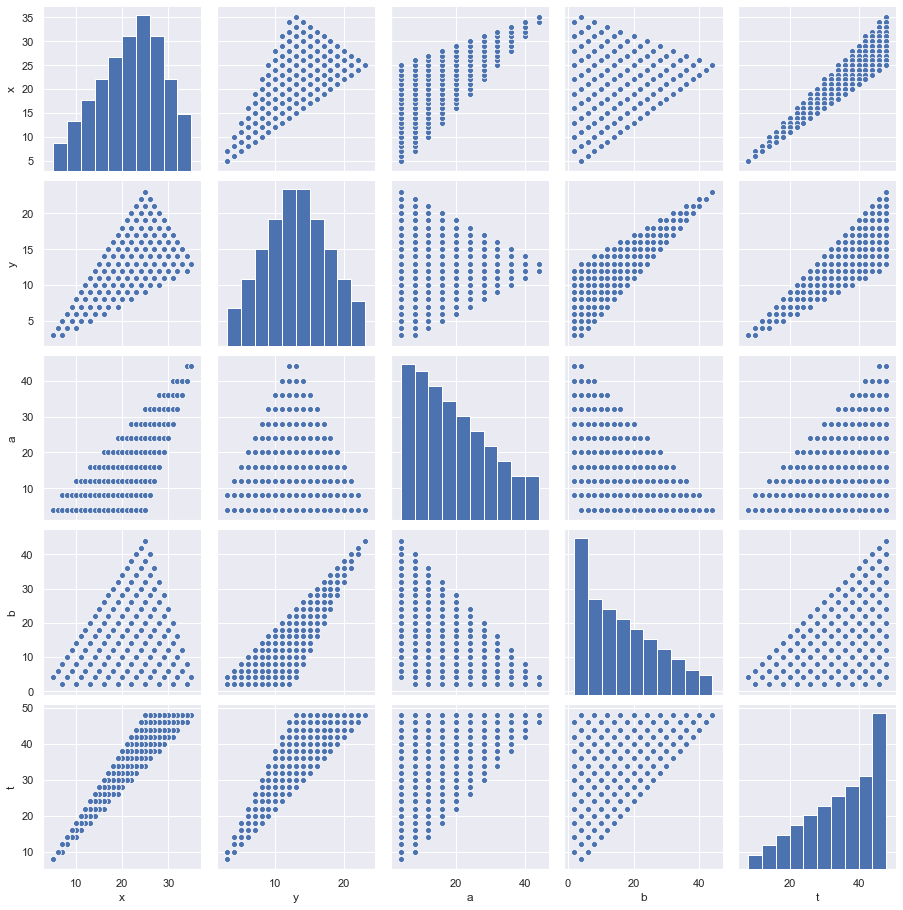

In [21]:
# sns.pairplot(df)

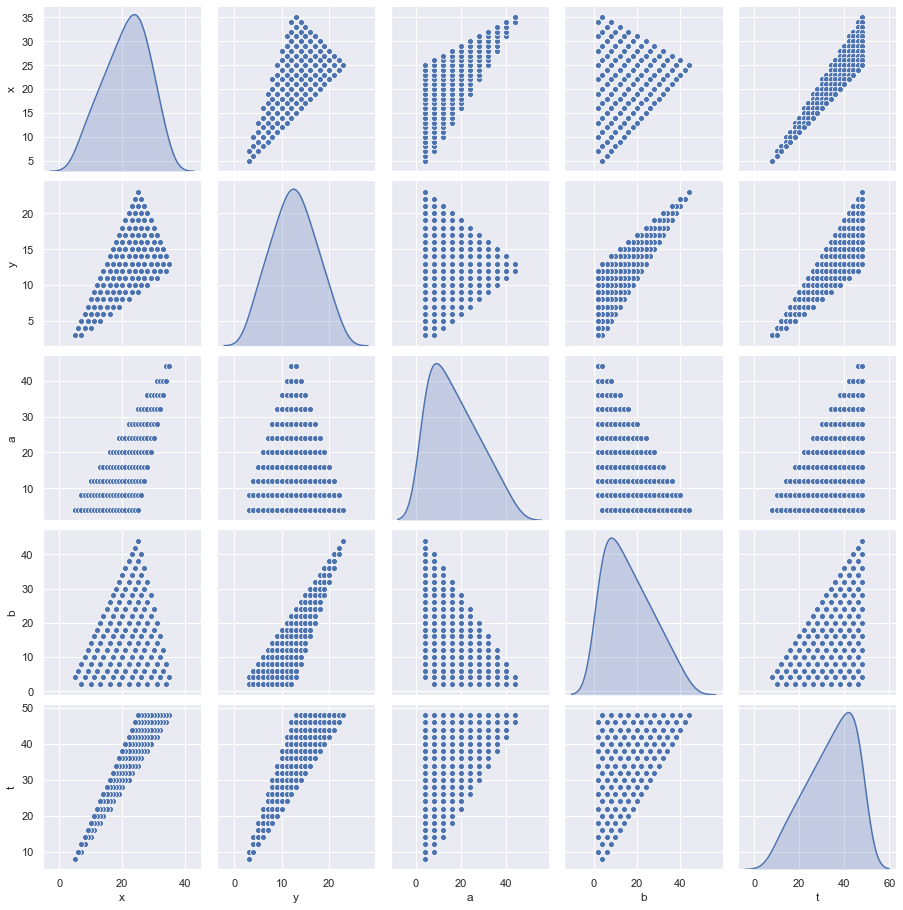

In [22]:
# sns.pairplot(df, diag_kind="kde")

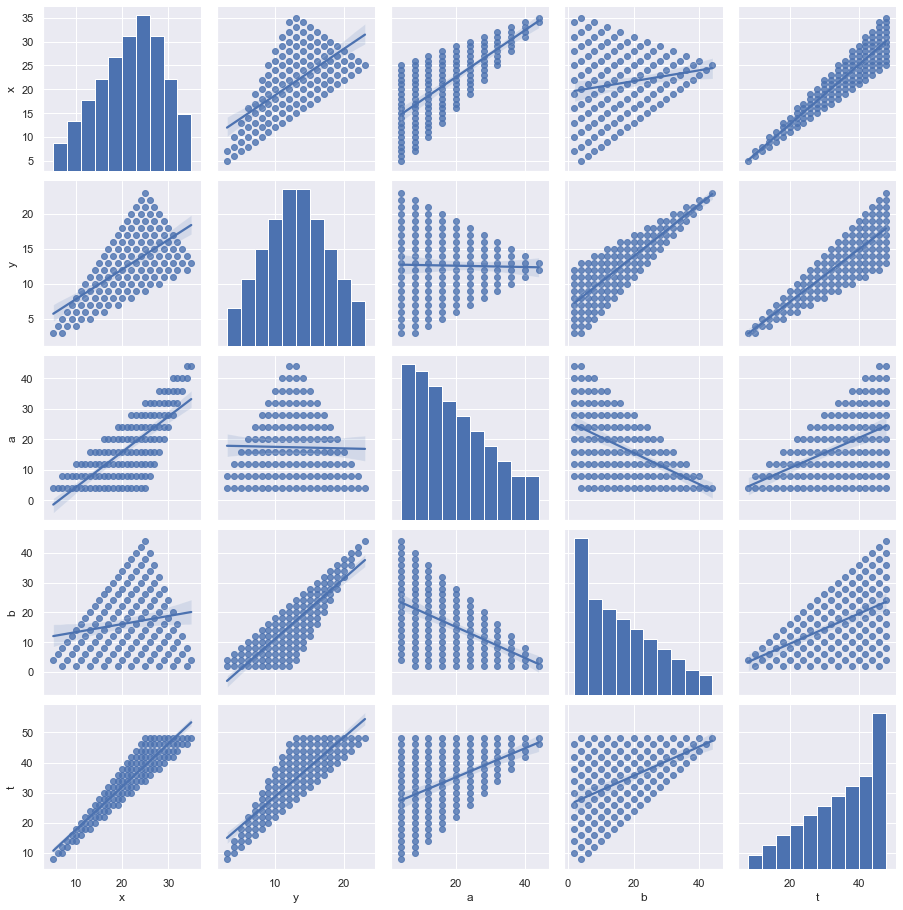

In [23]:
sns.pairplot(df, kind="reg")

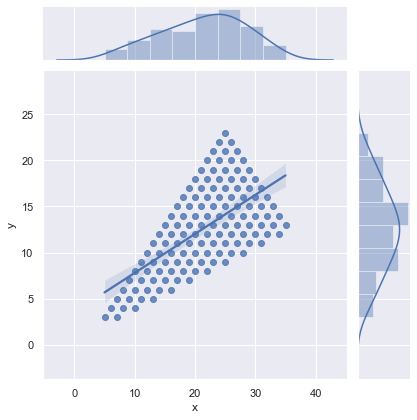

In [24]:
sns.jointplot(x = 'x', y = 'y', data = df, kind = 'reg')

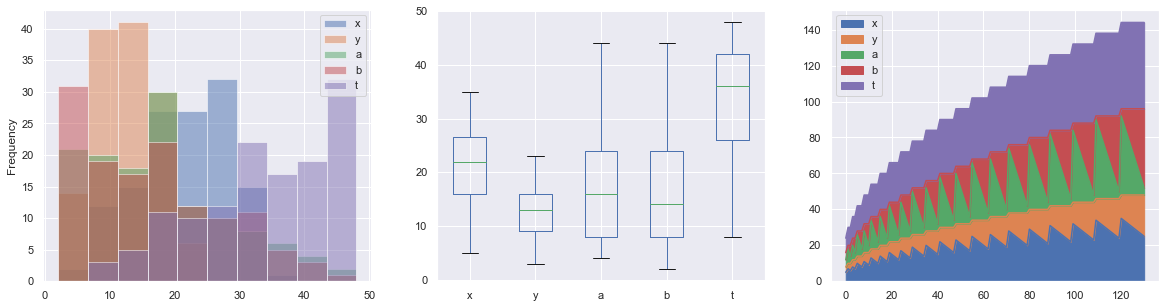

In [25]:
show_basis_df_plots(df, target_name=TARGET, gridshape=(1, 3), figsize=(20, 5))

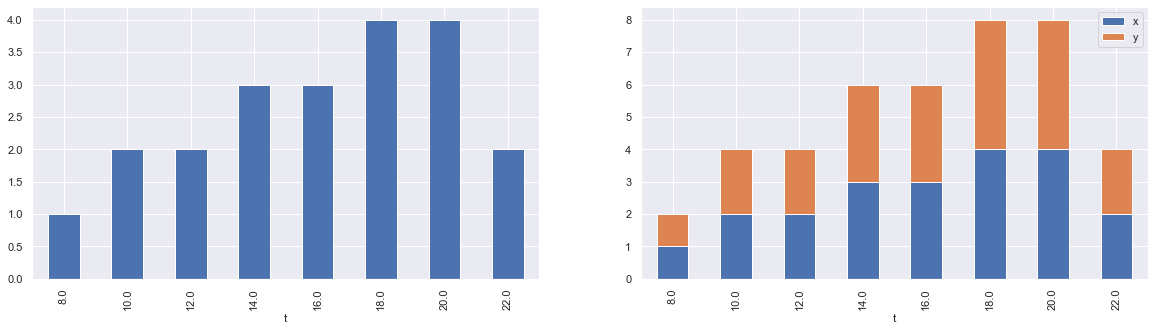

In [26]:
show_df_bars(df,
    target_name=TARGET,
    columns=[TARGET, 'x', 'y'],
    # n_elements=df.shape[0],
    n_elements=20,
    gridshape=(1, 2),
    figsize=(20, 5)
)

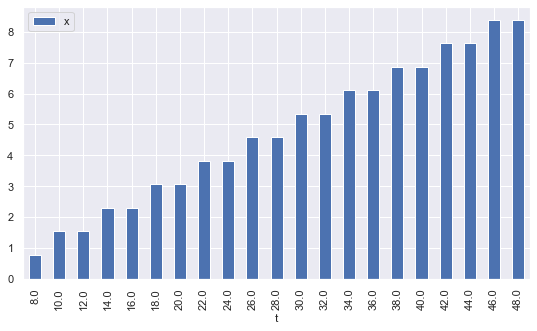

In [27]:
show_df_bars_scaled(df,
    target_name=TARGET,
    columns=[TARGET, 'x'],
    # n_elements=df.shape[0],
    n_elements=500,
    gridshape=(1, 2),
    figsize=(20, 5),
    axis=0)

In [28]:
def jointplot_df_sns(df, kind='reg', columns=None, gridshape=None, figsize=(10, 10)):
    if columns is None:
        columns = df.columns
    
    n_plots = len(columns) * (len(columns)-1)//2
    fig, axes = get_axes_plot_stem_line_scatter(n_plots, gridshape, figsize)
    
    pairs_columns = []
    for ii, c1 in enumerate(columns[:-1]):
        for jj, c2 in enumerate(columns[ii+1:]):
            pairs_columns.append([c1, c2])
            pass
        pass
    for ii, (x, y) in enumerate(pairs_columns):
        sns.jointplot(x=x, y=y, data=df, kind=kind, ax=axes[ii])
    pass

In [29]:
columns = df.columns
n_plots = len(columns) * (len(columns)-1) // 2
nrows = n_plots // 2 if n_plots % 2 == 0 else n_plots // 2 + 1
ncols = 2
gridshape = (nrows, ncols)
# jointplot_df_sns(df, kind='kde', columns=None, gridshape=None, figsize=(10, 10))

In [30]:
columns = df.columns
n_plots = len(columns) * (len(columns)-1) // 2
nrows = n_plots // 2 if n_plots % 2 == 0 else n_plots // 2 + 1
ncols = 2
gridshape = (nrows, ncols) # None
# boxplot_df_sns(df, hue=TARGET, columns=None, gridshape=gridshape, figsize=(10, 10))

In [31]:
columns = df.columns
n_plots = len(columns) * (len(columns)-1) // 2
nrows = n_plots // 2 if n_plots % 2 == 0 else n_plots // 2 + 1
ncols = 2
gridshape = (nrows, ncols) # None
# violinplot_df_sns(df, columns=None, gridshape=gridshape, figsize=(10, 10))

In [35]:
# df_pivot = df.pivot_table(values='t', index='x', columns='y')
# sns.clustermap(df_pivot, cmap = 'coolwarm', standard_scale = 1)

y     3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0  ...  14.0  \
x                                                                 ...         
5.0    8.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
6.0    NaN  10.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
7.0   10.0   NaN  12.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
8.0    NaN  12.0   NaN  14.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
9.0    NaN   NaN  14.0   NaN  16.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   
10.0   NaN  14.0   NaN  16.0   NaN  18.0   NaN   NaN   NaN   NaN  ...   NaN   
11.0   NaN   NaN  16.0   NaN  18.0   NaN  20.0   NaN   NaN   NaN  ...   NaN   
12.0   NaN   NaN   NaN  18.0   NaN  20.0   NaN  22.0   NaN   NaN  ...   NaN   
13.0   NaN   NaN  18.0   NaN  20.0   NaN  22.0   NaN  24.0   NaN  ...   NaN   
14.0   NaN   NaN   NaN  20.0   NaN  22.0   NaN  24.0   NaN  26.0  ...   NaN   
15.0   NaN   NaN   NaN   NaN  22.0   NaN  24.0   NaN  26.0   NaN  ...   NaN   
16.0   NaN   NaN   NaN  22.0   NaN  24.0   NaN  26.0   NaN  28.0  ...  30.0   
17.0   NaN   NaN   NaN   NaN  24.0   NaN  26.0   NaN  28.0   NaN  ...   NaN   
18.0   NaN   NaN   NaN   NaN   NaN  26.0   NaN  28.0   NaN  30.0  ...  32.0   
19.0   NaN   NaN   NaN   NaN  26.0   NaN  28.0   NaN  30.0   NaN  ...   NaN   
20.0   NaN   NaN   NaN   NaN   NaN  28.0   NaN  30.0   NaN  32.0  ...  34.0   
21.0   NaN   NaN   NaN   NaN   NaN   NaN  30.0   NaN  32.0   NaN  ...   NaN   
22.0   NaN   NaN   NaN   NaN   NaN  30.0   NaN  32.0   NaN  34.0  ...  36.0   
23.0   NaN   NaN   NaN   NaN   NaN   NaN  32.0   NaN  34.0   NaN  ...   NaN   
24.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  34.0   NaN  36.0  ...  38.0   
25.0   NaN   NaN   NaN   NaN   NaN   NaN  34.0   NaN  36.0   NaN  ...   NaN   
26.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  36.0   NaN  38.0  ...  40.0   
27.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  38.0   NaN  ...   NaN   
28.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  38.0   NaN  40.0  ...  42.0   
29.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  40.0   NaN  ...   NaN   
30.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  42.0  ...  44.0   
31.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  42.0   NaN  ...   NaN   
32.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  44.0  ...  46.0   
33.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
34.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  46.0  ...  48.0   
35.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

y     15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  
x                                                           
5.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
7.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9.0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
10.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
11.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
12.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
13.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
14.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
15.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
16.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
17.0  32.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
18.0   NaN  34.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
19.0  34.0   NaN  36.0   NaN   NaN   NaN   NaN   NaN   NaN  
20.0   NaN  36.0   NaN  38.0   NaN   NaN   NaN   NaN   NaN  
21.0  36.0   NaN  38.0   NaN  40.0   NaN   NaN   NaN   NaN  
22.0   NaN  38.0   NaN  40.0   NaN  42.0   NaN   NaN   NaN  
23.0  38.0   NaN  40.0   NaN  42.0   NaN  44.0   NaN   NaN  
24.0   NaN  40.0   NaN  42.0   NaN  44.0   NaN  46.0   NaN  
25.0  40.0   NaN  42.0   NaN  44.0   NaN  46.0   N

## Machine Learning Section

In [ ]:
X = df.loc[:, df.columns != TARGET].values
y = df[[TARGET]].values

In [ ]:
# show_Ordinary_Least_Squares_vs_Ridge_Regression_Variance(X[:, 0], y)

## References

### Pandas - References
- Visualization:
    - (visualization) https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
    
### Seaborn - References
- (pairplot) https://seaborn.pydata.org/generated/seaborn.pairplot.html
- (plots sns) https://towardsdatascience.com/visualizing-statistical-plots-with-seaborn-6b6e60ce5e71

### Blogs:
- (Chris Albon) https://chrisalbon.com/#machine_learning
- (Shane Lynn) https://www.shanelynn.ie/